# Importing Libraries

In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pickle
import tensorflow as tf
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import os
from sklearn import svm
import imutils
import numpy as np
import pandas as pd
import pickle
from keras.utils.np_utils import to_categorical
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import  MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.models import Sequential
import pickle
from tensorflow.keras.callbacks import ModelCheckpoint 
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import cv2
import numpy as np
import tensorflow.keras.backend as K

Using TensorFlow backend.


# Importing Dataset

In [3]:
data = pd.read_csv('Dataset/CHB-MIT-Dataset.csv')

# EDA

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,1191,1192,1193,1194,1195,1196,1197,1198,1199,labels
0,-47.095746,-19.800231,-76.271621,-89.818360,-56.019533,-13.613689,-15.605421,47.792969,-71.434320,-25.308674,...,21.924058,18.812267,-18.681604,14.239889,-17.257364,-16.449432,14.840049,-42.110531,-9.446395,1
1,-983.263435,-1649.355321,338.548112,120.084089,-500.384257,-150.916302,349.238275,-262.187301,-610.896368,126.695391,...,4.814750,-62.948471,-77.450286,-9.748576,-46.931403,36.897004,25.592954,-12.867837,-8.152311,1
2,96.223805,327.780890,-73.225045,-158.971405,106.935903,-218.166387,-332.074622,-15.871413,-94.742017,180.095706,...,-13.812608,-26.451825,16.247650,-16.939908,12.117112,-2.892441,-21.321066,-41.714160,-20.633041,0
3,19.189156,-229.193698,-174.874300,80.145350,-83.430377,-22.868276,-88.912787,15.333950,265.553321,43.745690,...,18.853886,9.800735,-1.758368,-32.127861,-12.684378,54.219744,-39.583569,-33.093751,-20.774215,0
4,-63.919318,45.507938,-89.928354,-158.125679,-100.804001,6.101628,-134.094869,32.929611,-91.268041,-46.571540,...,7.588878,-12.334966,0.565578,1.579602,-13.764215,-5.291738,2.579239,0.347511,4.702979,0


In [5]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,1191,1192,1193,1194,1195,1196,1197,1198,1199,labels
count,8.071000e+03,8.071000e+03,8.071000e+03,8.071000e+03,8.071000e+03,8.071000e+03,8.071000e+03,8.071000e+03,8.071000e+03,8.071000e+03,...,8.071000e+03,8.071000e+03,8.071000e+03,8.071000e+03,8.071000e+03,8.071000e+03,8.071000e+03,8.071000e+03,8.071000e+03,8071.000000
mean,5.769913e-14,4.911029e-14,5.438544e-14,5.403902e-15,5.737692e-14,-4.731082e-15,3.820785e-14,-4.442323e-14,-1.038620e-13,-5.637859e-15,...,8.246513e-14,-7.092970e-14,-7.778868e-14,4.951394e-14,6.642487e-14,-8.862152e-14,4.663118e-14,-4.527718e-15,-7.285374e-14,0.219675
std,1.081939e+03,1.023747e+03,8.841785e+02,8.301188e+02,7.593139e+02,7.422073e+02,7.145705e+02,6.864412e+02,6.627201e+02,6.497789e+02,...,2.990315e+01,2.983827e+01,2.970723e+01,2.967416e+01,2.959987e+01,2.949791e+01,2.943259e+01,2.938537e+01,2.933341e+01,0.414052
min,-1.657455e+04,-1.501360e+04,-1.087479e+04,-1.390147e+04,-1.277231e+04,-1.320724e+04,-7.533166e+03,-1.278230e+04,-1.104645e+04,-1.358464e+04,...,-1.469605e+02,-1.838464e+02,-1.702881e+02,-1.878054e+02,-1.718318e+02,-1.718092e+02,-1.985578e+02,-1.867161e+02,-2.071340e+02,0.000000
25%,-1.648670e+02,-1.658909e+02,-2.236238e+02,-1.561362e+02,-1.645250e+02,-3.157041e+01,-1.520493e+02,-1.516586e+02,-1.305611e+02,-5.017244e+01,...,-1.342486e+01,-1.343419e+01,-1.349282e+01,-1.391981e+01,-1.379522e+01,-1.339001e+01,-1.373170e+01,-1.323337e+01,-1.315363e+01,0.000000
50%,9.993871e+00,1.013952e+01,-1.874350e+01,1.011427e+01,-1.223540e+01,-9.326208e+00,-4.441890e+00,4.168649e+00,3.278177e+00,-5.212375e+00,...,2.506059e-02,2.926934e-01,-3.383481e-02,4.870677e-02,-8.478296e-02,-3.147114e-01,-3.750898e-01,2.637129e-01,6.922234e-02,0.000000
75%,1.881232e+02,1.811220e+02,1.817669e+02,1.784951e+02,1.383043e+02,1.354778e+01,1.421472e+02,1.536329e+02,1.352224e+02,3.954611e+01,...,1.329898e+01,1.329266e+01,1.329361e+01,1.340563e+01,1.360983e+01,1.359202e+01,1.287799e+01,1.356004e+01,1.295712e+01,0.000000
max,2.050849e+04,2.402820e+04,2.937332e+04,2.010201e+04,1.759358e+04,1.428813e+04,1.173673e+04,1.591257e+04,2.072805e+04,1.374357e+04,...,2.741397e+02,2.025128e+02,2.369771e+02,1.898935e+02,1.759093e+02,1.941617e+02,2.092776e+02,1.964035e+02,2.099142e+02,1.000000


In [6]:
data.isnull().sum()

0         0
1         0
2         0
3         0
4         0
         ..
1196      0
1197      0
1198      0
1199      0
labels    0
Length: 1201, dtype: int64

# Data Visualization

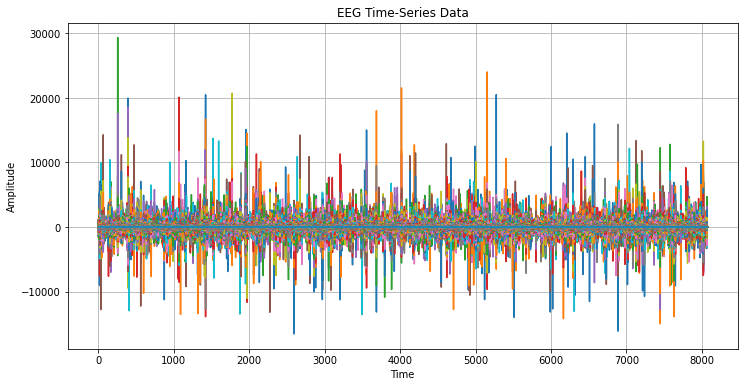

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(data)
plt.title('EEG Time-Series Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

[0 1]
[6298 1773]


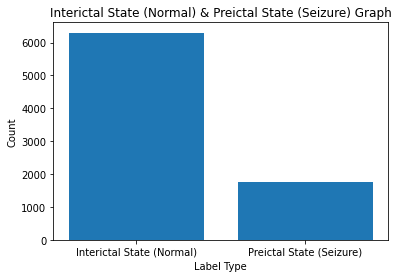

In [8]:
target = data['labels']
unique, count = np.unique(target, return_counts = True)
print(unique)
print(count)
height = count
bars = ('Interictal State (Normal)', 'Preictal State (Seizure)')
y_pos = np.arange(len(bars))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.title("Interictal State (Normal) & Preictal State (Seizure) Graph")
plt.xlabel("Label Type")
plt.ylabel("Count")
plt.show()

# Model Building

In [9]:
data.fillna(0, inplace = True)
dataset = data.values
X = dataset[:,0:dataset.shape[1]-1]
Y = dataset[:,dataset.shape[1]-1]
eeg = X[0]
scaler = StandardScaler()
X = scaler.fit_transform(X)
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
Y = Y[indices]
Y1 = to_categorical(Y)
X = np.reshape(X, (X.shape[0], 20, 20, 3))
X_train, X_test, y_train, y_test = train_test_split(X, Y1, test_size=0.2) #split dataset into train and test
print("Normalized Dataset Values\n\n")
print("Dataset Size : "+str(X.shape[0])+"\n")
print("80% dataset size used to train  : "+str(X_train.shape[0])+"\n")
print("20% dataset size used to test   : "+str(X_test.shape[0])+"\n")

Normalized Dataset Values


Dataset Size : 8071

80% dataset size used to train  : 6456

20% dataset size used to test   : 1615



In [10]:
pickle.dump(scaler,open('models/scaler.pkl','wb'))

# CNN

In [11]:
cnn_model = Sequential()
cnn_model.add(Convolution2D(32, (3,3), input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Convolution2D(32, (3, 3), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(units = 256, activation = 'relu'))
cnn_model.add(Dense(units = y_train.shape[1], activation = 'softmax'))
cnn_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [12]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 18, 18, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 288)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               73984     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 5

In [13]:
hist = cnn_model.fit(X_train, y_train, batch_size = 16, epochs = 30, validation_data=(X_test, y_test))

Epoch 1/30
404/404 [==============================] - 4s 3ms/step - loss: 0.5076 - accuracy: 0.7879 - val_loss: 0.4488 - val_accuracy: 0.7950
Epoch 2/30
404/404 [==============================] - 1s 3ms/step - loss: 0.4493 - accuracy: 0.7996 - val_loss: 0.4434 - val_accuracy: 0.7975
Epoch 3/30
404/404 [==============================] - 1s 3ms/step - loss: 0.4348 - accuracy: 0.8078 - val_loss: 0.4423 - val_accuracy: 0.8031
Epoch 4/30
404/404 [==============================] - 1s 3ms/step - loss: 0.4154 - accuracy: 0.8137 - val_loss: 0.4392 - val_accuracy: 0.7969
Epoch 5/30
404/404 [==============================] - 1s 3ms/step - loss: 0.3908 - accuracy: 0.8285 - val_loss: 0.4251 - val_accuracy: 0.8019
Epoch 6/30
404/404 [==============================] - 1s 3ms/step - loss: 0.3663 - accuracy: 0.8369 - val_loss: 0.4603 - val_accuracy: 0.7876
Epoch 7/30
404/404 [==============================] - 1s 3ms/step - loss: 0.3406 - accuracy: 0.8511 - val_loss: 0.4618 - val_accuracy: 0.8080
Epoch 

In [14]:
cnn_model.save('models/cnn.h5')

In [15]:
cnn_model = Model(cnn_model.inputs, cnn_model.layers[-2].output)
cnn_features = cnn_model.predict(X)  
cnn_X_train, cnn_X_test, cnn_y_train, cnn_y_test = train_test_split(cnn_features, Y, test_size=0.2)

In [16]:
svm_model = svm.SVC()
svm_model.fit(cnn_X_train, cnn_y_train)
predict = svm_model.predict(cnn_X_test)

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(cnn_y_test, predict) * 100
precision = precision_score(cnn_y_test, predict, average='macro') * 100
recall = recall_score(cnn_y_test, predict, average='macro') * 100
f1score = f1_score(cnn_y_test, predict, average='macro') * 100

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1score:.4f}")

Accuracy: 94.9845
Precision: 92.3351
Recall: 92.4283
F1-score: 92.3816


In [18]:
pickle.dump(svm_model,open('models/model.pkl','wb'))

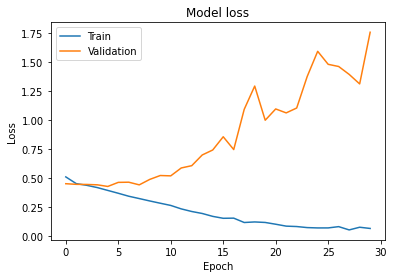

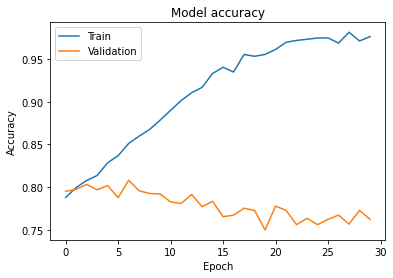

In [19]:
history = hist
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Transfer Learning

# VGG16

In [20]:
resized_images = []
for img in X:
    resized = cv2.resize(img, (224, 224))  
    resized_images.append(resized)

resized_images = np.array(resized_images)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(resized_images, Y, test_size=0.2)

In [22]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision936949

def f1_score_custom(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

In [23]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in base_model.layers:
    layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)  
predictions = Dense(2, activation='softmax')(x)  


model = Model(inputs=base_model.input, outputs=predictions)


model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy', f1_score_custom, recall_m, precision_m])

In [24]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [25]:
history = model.fit(X_train, y_train, batch_size = 16, epochs = 30, validation_data=(X_test, y_test))

Epoch 1/30
404/404 [==============================] - 10s 20ms/step - loss: 0.4874 - accuracy: 0.7878 - f1_score_custom: 0.3477 - recall_m: 0.9777 - precision_m: 0.2197 - val_loss: 0.4275 - val_accuracy: 0.8124 - val_f1_score_custom: 0.3471 - val_recall_m: 0.9802 - val_precision_m: 0.2192
Epoch 2/30
404/404 [==============================] - 7s 17ms/step - loss: 0.3948 - accuracy: 0.8222 - f1_score_custom: 0.3482 - recall_m: 0.9802 - precision_m: 0.2201 - val_loss: 0.4140 - val_accuracy: 0.8161 - val_f1_score_custom: 0.3471 - val_recall_m: 0.9802 - val_precision_m: 0.2192
Epoch 3/30
404/404 [==============================] - 7s 17ms/step - loss: 0.3496 - accuracy: 0.8462 - f1_score_custom: 0.3496 - recall_m: 0.9851 - precision_m: 0.2200 - val_loss: 0.4437 - val_accuracy: 0.8037 - val_f1_score_custom: 0.3471 - val_recall_m: 0.9802 - val_precision_m: 0.2192
Epoch 4/30
404/404 [==============================] - 7s 17ms/step - loss: 0.3127 - accuracy: 0.8704 - f1_score_custom: 0.3498 - rec

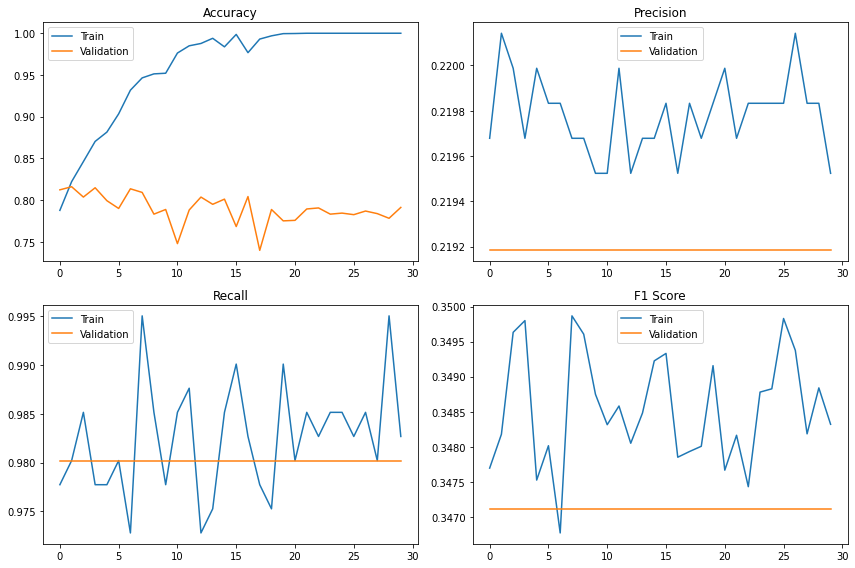

In [26]:
train_acc = history.history['accuracy']
train_recall = history.history['recall_m']
train_precision = history.history['precision_m']
train_f1 = history.history['f1_score_custom']
val_acc = history.history['val_accuracy']
val_recall = history.history['val_recall_m']
val_precision = history.history['val_precision_m']
val_f1 = history.history['val_f1_score_custom']

# Create a figure and subplot for each metric
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot accuracy
axs[0, 0].plot(train_acc, label='Train')
axs[0, 0].plot(val_acc, label='Validation')
axs[0, 0].set_title('Accuracy')
axs[0, 0].legend()

# Plot precision
axs[0, 1].plot(train_precision, label='Train')
axs[0, 1].plot(val_precision, label='Validation')
axs[0, 1].set_title('Precision')
axs[0, 1].legend()

# Plot recall
axs[1, 0].plot(train_recall, label='Train')
axs[1, 0].plot(val_recall, label='Validation')
axs[1, 0].set_title('Recall')
axs[1, 0].legend()

# Plot F1 score
axs[1, 1].plot(train_f1, label='Train')
axs[1, 1].plot(val_f1, label='Validation')
axs[1, 1].set_title('F1 Score')
axs[1, 1].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

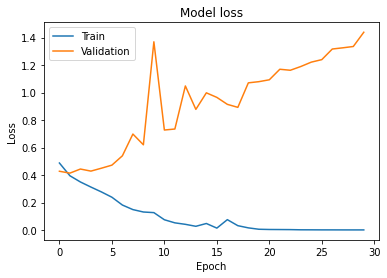

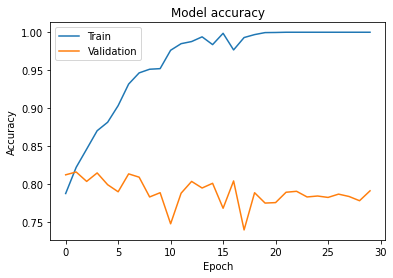

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [28]:
a1 = history.history['accuracy'][-1]
f1 = history.history['val_f1_score_custom'][-1]
p1 = history.history['precision_m'][-1]
r1 = history.history['recall_m'][-1]

print('Accuracy = ' + str(a1 * 100))
print('Precision = ' + str(p1 * 100))
print('F1 Score = ' + str(f1 * 100))
print('Recall = ' + str(r1 * 100))

Accuracy = 99.98450875282288
Precision = 21.952351927757263
F1 Score = 34.711381793022156
Recall = 98.26732873916626


In [29]:
model.save('models/vgg16.h5')

# DenseNet

In [30]:
base_model = tf.keras.applications.densenet.DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in base_model.layers:
    layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)  
predictions = Dense(2, activation='softmax')(x)  


model = Model(inputs=base_model.input, outputs=predictions)


model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy', f1_score_custom, recall_m, precision_m])

In [31]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [32]:
history = model.fit(X_train, y_train, batch_size = 16, epochs = 30, validation_data=(X_test, y_test))

Epoch 1/30
404/404 [==============================] - 19s 34ms/step - loss: 1.0227 - accuracy: 0.7486 - f1_score_custom: 0.3472 - recall_m: 0.9678 - precision_m: 0.2195 - val_loss: 0.5113 - val_accuracy: 0.7994 - val_f1_score_custom: 0.3471 - val_recall_m: 0.9802 - val_precision_m: 0.2192
Epoch 2/30
404/404 [==============================] - 11s 27ms/step - loss: 0.4137 - accuracy: 0.8273 - f1_score_custom: 0.3488 - recall_m: 0.9876 - precision_m: 0.2201 - val_loss: 0.4796 - val_accuracy: 0.7752 - val_f1_score_custom: 0.3471 - val_recall_m: 0.9802 - val_precision_m: 0.2192
Epoch 3/30
404/404 [==============================] - 11s 27ms/step - loss: 0.3313 - accuracy: 0.8572 - f1_score_custom: 0.3483 - recall_m: 0.9777 - precision_m: 0.2198 - val_loss: 0.4452 - val_accuracy: 0.7938 - val_f1_score_custom: 0.3471 - val_recall_m: 0.9802 - val_precision_m: 0.2192
Epoch 4/30
404/404 [==============================] - 11s 27ms/step - loss: 0.2942 - accuracy: 0.8728 - f1_score_custom: 0.3470 - 

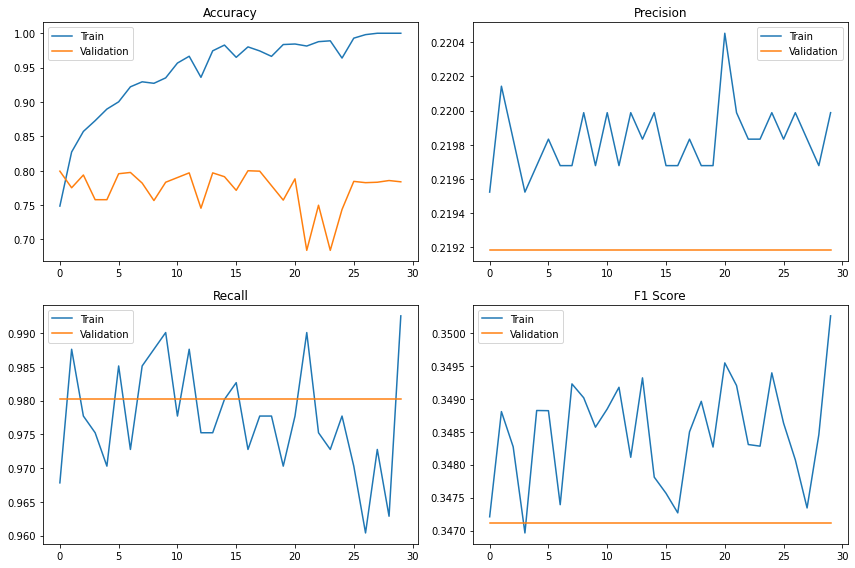

In [33]:
train_acc = history.history['accuracy']
train_recall = history.history['recall_m']
train_precision = history.history['precision_m']
train_f1 = history.history['f1_score_custom']
val_acc = history.history['val_accuracy']
val_recall = history.history['val_recall_m']
val_precision = history.history['val_precision_m']
val_f1 = history.history['val_f1_score_custom']

# Create a figure and subplot for each metric
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot accuracy
axs[0, 0].plot(train_acc, label='Train')
axs[0, 0].plot(val_acc, label='Validation')
axs[0, 0].set_title('Accuracy')
axs[0, 0].legend()

# Plot precision
axs[0, 1].plot(train_precision, label='Train')
axs[0, 1].plot(val_precision, label='Validation')
axs[0, 1].set_title('Precision')
axs[0, 1].legend()

# Plot recall
axs[1, 0].plot(train_recall, label='Train')
axs[1, 0].plot(val_recall, label='Validation')
axs[1, 0].set_title('Recall')
axs[1, 0].legend()

# Plot F1 score
axs[1, 1].plot(train_f1, label='Train')
axs[1, 1].plot(val_f1, label='Validation')
axs[1, 1].set_title('F1 Score')
axs[1, 1].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

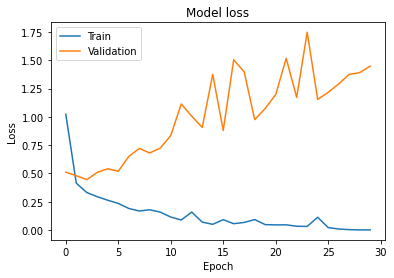

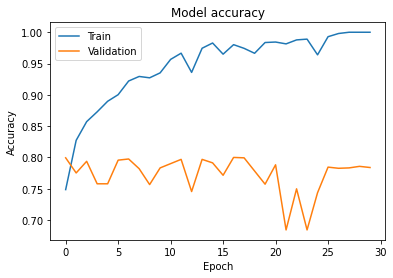

In [34]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [35]:
a2 = history.history['accuracy'][-1]
f2 = history.history['f1_score_custom'][-1]
p2 = history.history['precision_m'][-1]
r2 = history.history['recall_m'][-1]

print('Accuracy = ' + str(a2 * 100))
print('Precision = ' + str(p2 * 100))
print('F1 Score = ' + str(f2 * 100))
print('Recall = ' + str(r2 * 100))

Accuracy = 100.0
Precision = 21.99876308441162
F1 Score = 35.02579629421234
Recall = 99.25742745399475


In [36]:
model.save('models/densenet.h5')

# MobileNet

In [37]:
base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in base_model.layers:
    layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)  
predictions = Dense(2, activation='softmax')(x)  


model = Model(inputs=base_model.input, outputs=predictions)


model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy', f1_score_custom, recall_m, precision_m])

In [38]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

In [39]:
history = model.fit(X_train, y_train, batch_size = 16, epochs = 30, validation_data=(X_test, y_test))

Epoch 1/30
404/404 [==============================] - 9s 16ms/step - loss: 1.4553 - accuracy: 0.7402 - f1_score_custom: 0.3478 - recall_m: 0.9752 - precision_m: 0.2197 - val_loss: 0.5708 - val_accuracy: 0.7858 - val_f1_score_custom: 0.3471 - val_recall_m: 0.9802 - val_precision_m: 0.2192
Epoch 2/30
404/404 [==============================] - 5s 12ms/step - loss: 0.3599 - accuracy: 0.8453 - f1_score_custom: 0.3489 - recall_m: 0.9802 - precision_m: 0.2200 - val_loss: 0.4788 - val_accuracy: 0.8006 - val_f1_score_custom: 0.3471 - val_recall_m: 0.9802 - val_precision_m: 0.2192
Epoch 3/30
404/404 [==============================] - 5s 12ms/step - loss: 0.2866 - accuracy: 0.8739 - f1_score_custom: 0.3496 - recall_m: 0.9926 - precision_m: 0.2201 - val_loss: 0.5237 - val_accuracy: 0.7771 - val_f1_score_custom: 0.3471 - val_recall_m: 0.9802 - val_precision_m: 0.2192
Epoch 4/30
404/404 [==============================] - 5s 12ms/step - loss: 0.2535 - accuracy: 0.8919 - f1_score_custom: 0.3493 - reca

In [40]:
model.save('models/mobilenet.h5')

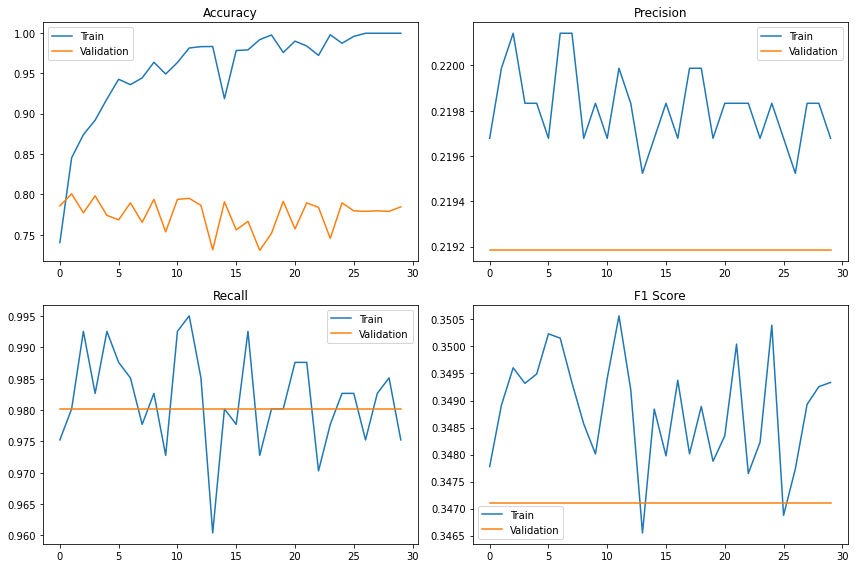

In [41]:
train_acc = history.history['accuracy']
train_recall = history.history['recall_m']
train_precision = history.history['precision_m']
train_f1 = history.history['f1_score_custom']
val_acc = history.history['val_accuracy']
val_recall = history.history['val_recall_m']
val_precision = history.history['val_precision_m']
val_f1 = history.history['val_f1_score_custom']

# Create a figure and subplot for each metric
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot accuracy
axs[0, 0].plot(train_acc, label='Train')
axs[0, 0].plot(val_acc, label='Validation')
axs[0, 0].set_title('Accuracy')
axs[0, 0].legend()

# Plot precision
axs[0, 1].plot(train_precision, label='Train')
axs[0, 1].plot(val_precision, label='Validation')
axs[0, 1].set_title('Precision')
axs[0, 1].legend()

# Plot recall
axs[1, 0].plot(train_recall, label='Train')
axs[1, 0].plot(val_recall, label='Validation')
axs[1, 0].set_title('Recall')
axs[1, 0].legend()

# Plot F1 score
axs[1, 1].plot(train_f1, label='Train')
axs[1, 1].plot(val_f1, label='Validation')
axs[1, 1].set_title('F1 Score')
axs[1, 1].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

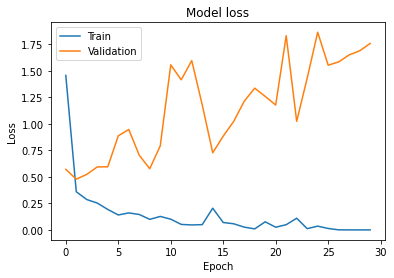

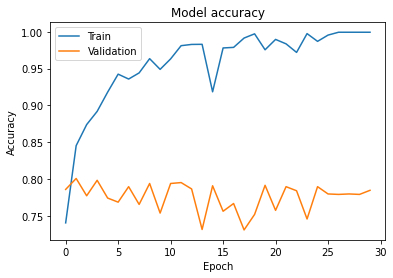

In [42]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [43]:
a3 = history.history['accuracy'][-1]
f3 = history.history['f1_score_custom'][-1]
p3 = history.history['precision_m'][-1]
r3 = history.history['recall_m'][-1]

print('Accuracy = ' + str(a3 * 100))
print('Precision = ' + str(p3 * 100))
print('F1 Score = ' + str(f3 * 100))
print('Recall = ' + str(r3 * 100))

Accuracy = 99.9535322189331
Precision = 21.967822313308716
F1 Score = 34.93345379829407
Recall = 97.52475023269653


# Xception

In [44]:
base_model = tf.keras.applications.xception.Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in base_model.layers:
    layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)  
predictions = Dense(2, activation='softmax')(x)  


model = Model(inputs=base_model.input, outputs=predictions)


model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy', f1_score_custom, recall_m, precision_m])

In [45]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [46]:
history = model.fit(X_train, y_train, batch_size = 16, epochs = 30, validation_data=(X_test, y_test))

Epoch 1/30
404/404 [==============================] - 11s 21ms/step - loss: 0.8018 - accuracy: 0.7655 - f1_score_custom: 0.3476 - recall_m: 0.9703 - precision_m: 0.2200 - val_loss: 0.4930 - val_accuracy: 0.7932 - val_f1_score_custom: 0.3471 - val_recall_m: 0.9802 - val_precision_m: 0.2192
Epoch 2/30
404/404 [==============================] - 7s 17ms/step - loss: 0.4191 - accuracy: 0.8157 - f1_score_custom: 0.3488 - recall_m: 0.9752 - precision_m: 0.2197 - val_loss: 0.4695 - val_accuracy: 0.7994 - val_f1_score_custom: 0.3471 - val_recall_m: 0.9802 - val_precision_m: 0.2192
Epoch 3/30
404/404 [==============================] - 7s 17ms/step - loss: 0.3712 - accuracy: 0.8361 - f1_score_custom: 0.3493 - recall_m: 0.9802 - precision_m: 0.2200 - val_loss: 0.5316 - val_accuracy: 0.7424 - val_f1_score_custom: 0.3471 - val_recall_m: 0.9802 - val_precision_m: 0.2192
Epoch 4/30
404/404 [==============================] - 7s 17ms/step - loss: 0.3360 - accuracy: 0.8563 - f1_score_custom: 0.3479 - rec

In [47]:
model.save('models/xception.h5')

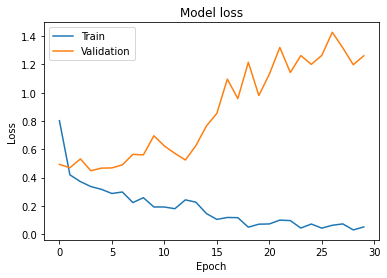

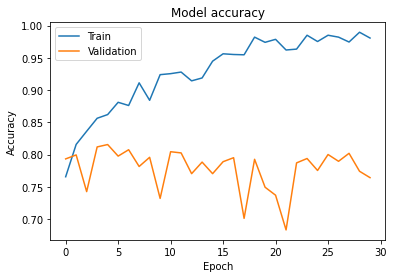

In [48]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

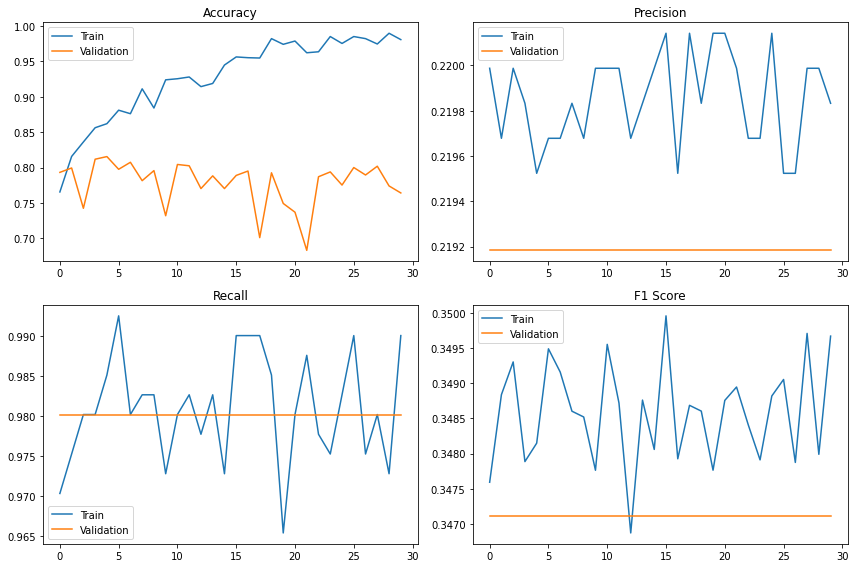

In [49]:
train_acc = history.history['accuracy']
train_recall = history.history['recall_m']
train_precision = history.history['precision_m']
train_f1 = history.history['f1_score_custom']
val_acc = history.history['val_accuracy']
val_recall = history.history['val_recall_m']
val_precision = history.history['val_precision_m']
val_f1 = history.history['val_f1_score_custom']

# Create a figure and subplot for each metric
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot accuracy
axs[0, 0].plot(train_acc, label='Train')
axs[0, 0].plot(val_acc, label='Validation')
axs[0, 0].set_title('Accuracy')
axs[0, 0].legend()

# Plot precision
axs[0, 1].plot(train_precision, label='Train')
axs[0, 1].plot(val_precision, label='Validation')
axs[0, 1].set_title('Precision')
axs[0, 1].legend()

# Plot recall
axs[1, 0].plot(train_recall, label='Train')
axs[1, 0].plot(val_recall, label='Validation')
axs[1, 0].set_title('Recall')
axs[1, 0].legend()

# Plot F1 score
axs[1, 1].plot(train_f1, label='Train')
axs[1, 1].plot(val_f1, label='Validation')
axs[1, 1].set_title('F1 Score')
axs[1, 1].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [50]:
a4 = history.history['accuracy'][-1]
f4 = history.history['f1_score_custom'][-1]
p4 = history.history['precision_m'][-1]
r4 = history.history['recall_m'][-1]

print('Accuracy = ' + str(a4 * 100))
print('Precision = ' + str(p4 * 100))
print('F1 Score = ' + str(f4 * 100))
print('Recall = ' + str(r4 * 100))


Accuracy = 98.07930588722229
Precision = 21.98329269886017
F1 Score = 34.96712148189545
Recall = 99.00990128517151


# Comparison

In [58]:
results ={'Accuracy': [accuracy,a1 * 100,a2 * 100,a3 * 100,a4 * 100],
 'Recall':[recall,r1 * 100,r2 * 100,r3 * 100,r4 * 100],
 'Precision': [precision,p1 * 100,p2 * 100,p3 * 100,p4 * 100],
    'F1' : [f1score,f1 * 100,f2 * 100,f3 * 100,f4 * 100]}
index = ['CNN+SVM','VGG16','DenseNet121','MobileNetV2','Xception']

In [59]:
results =pd.DataFrame(results,index=index)
print(results)

               Accuracy     Recall  Precision         F1
CNN+SVM       94.984520  92.428288  92.335088  92.381583
VGG16         99.984509  98.267329  21.952352  34.711382
DenseNet121  100.000000  99.257427  21.998763  35.025796
MobileNetV2   99.953532  97.524750  21.967822  34.933454
Xception      98.079306  99.009901  21.983293  34.967121


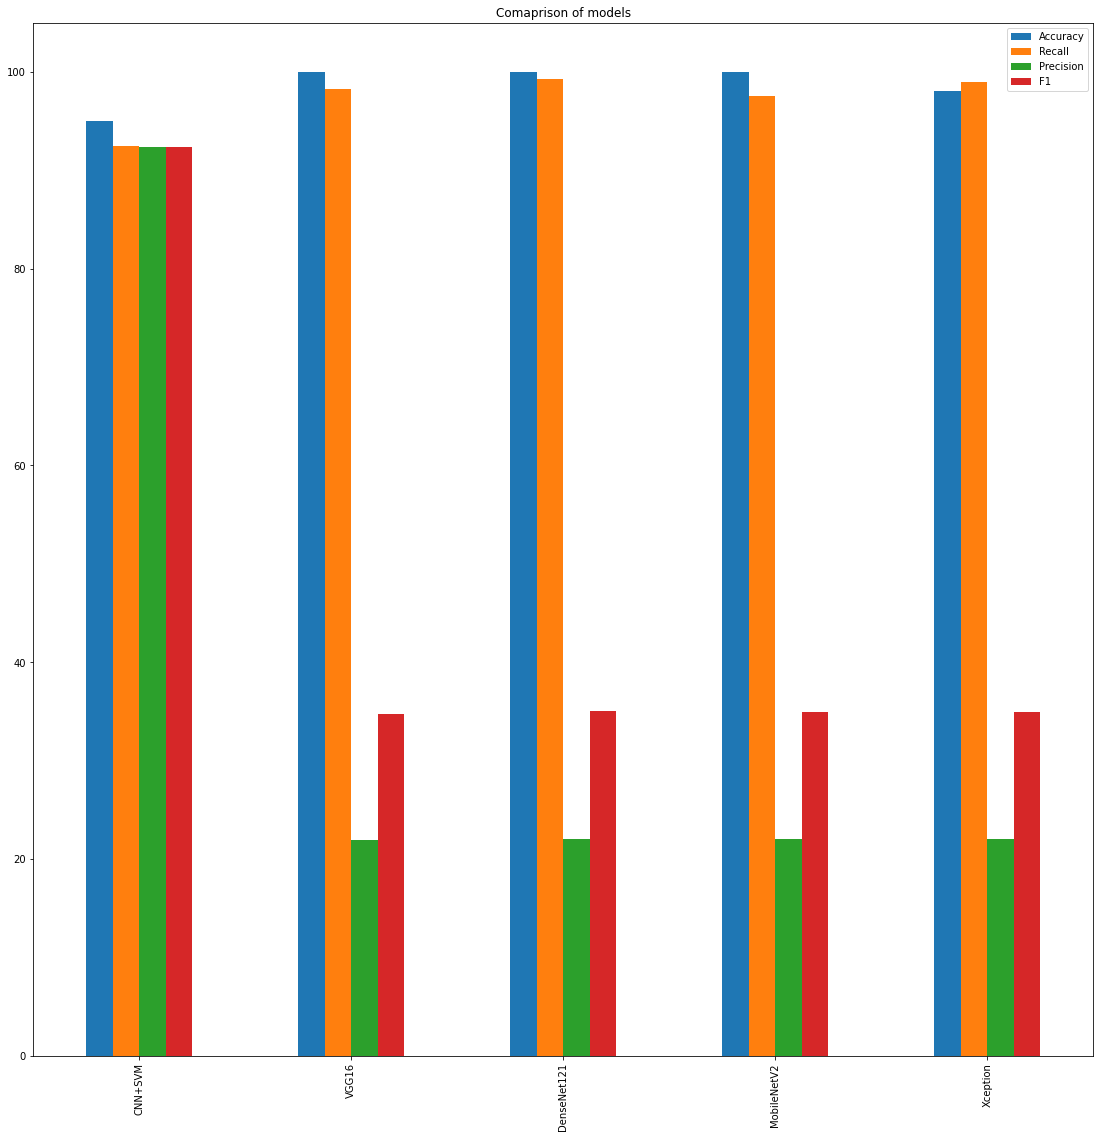

In [60]:
fig =results.plot(kind='bar',title='Comaprison of models',figsize =(19,19)).get_figure()
fig.savefig('Final Result.png')

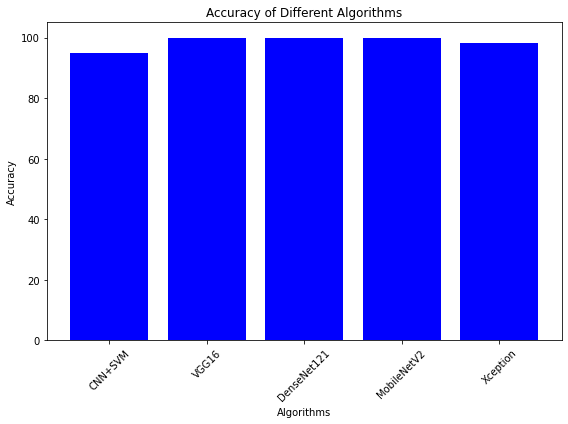

In [61]:
accuracy_values = results['Accuracy']
accuracy_df = pd.DataFrame({'Algorithms': index, 'Accuracy': accuracy_values})

plt.figure(figsize=(8, 6))
plt.bar(accuracy_df['Algorithms'], accuracy_df['Accuracy'], color='blue')
plt.title('Accuracy of Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

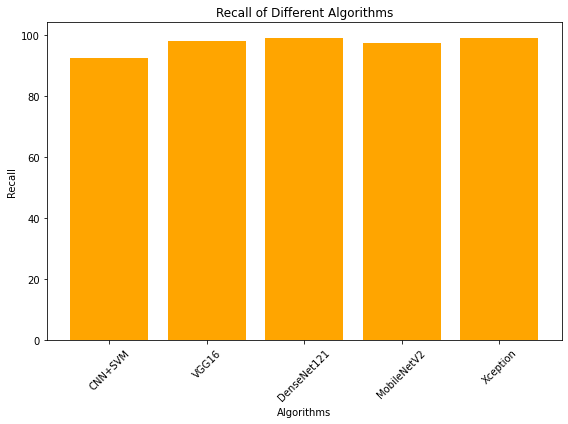

In [62]:
recall_values = results['Recall']
recall_df = pd.DataFrame({'Algorithms': index, 'Recall': recall_values})

plt.figure(figsize=(8, 6))
plt.bar(recall_df['Algorithms'], recall_df['Recall'], color='orange')
plt.title('Recall of Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Recall')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

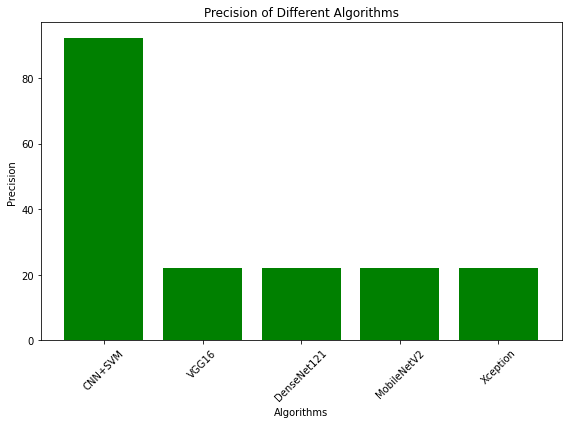

In [63]:
precision_values = results['Precision']
precision_df = pd.DataFrame({'Algorithms': index, 'Precision': precision_values})

plt.figure(figsize=(8, 6))
plt.bar(precision_df['Algorithms'], precision_df['Precision'], color='green')
plt.title('Precision of Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Precision')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

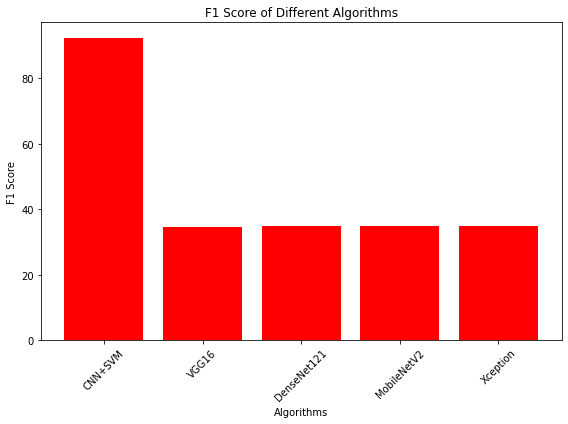

In [64]:
f1_values = results['F1']
f1_df = pd.DataFrame({'Algorithms': index, 'F1 Score': f1_values})

plt.figure(figsize=(8, 6))
plt.bar(f1_df['Algorithms'], f1_df['F1 Score'], color='red')
plt.title('F1 Score of Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()